# Home Credit Indonesia: Credit Score Predicting 

## EDA (Exploratory Data Analysis)

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

from sklearn.metrics import confusion_matrix
import sklearn.metrics as met
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
import sklearn.feature_selection as fs
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.utils import resample
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/Colab Notebooks/application_train.csv'


Mounted at /content/gdrive


In [3]:
df_train = pd.read_csv(path) 
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
print('data shape:',df_train.shape)
print('='*100)
print('data columns', df_train.columns)

data shape: (307511, 122)
data columns Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [6]:
df_train.DAYS_REGISTRATION.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: DAYS_REGISTRATION
Non-Null Count   Dtype  
--------------   -----  
307511 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### detecting duplication

In [8]:
print('number of data duplication is:', df_train.duplicated().sum())

number of data duplication is: 0


In [9]:
# MASTIIN LAGI APAKAH ADA NAN DI df_train atau ENGGAK

nan_values = df_train.isna().sum().values

nan_values

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,     12,    278,   1292,      0,      0,      0,      0,
            0,      0,      0,      0,      0, 202929,      0,      0,
            0,      0,      0,      0,  96391,      2,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0, 173378,    660,  60965, 156061, 179943, 150007, 204488,
       214865, 163891, 154828, 153020, 208642, 182590, 210199, 154350,
       213514, 169682, 156061, 179943, 150007, 204488, 214865, 163891,
       154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682,
       156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020,
       208642, 182590, 210199, 154350, 213514, 169682, 210295, 154297,
       148431, 156341, 145755,   1021,   1021,   1021,   1021,      1,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [10]:
# Menghitung jumlah kolom based on 45% dari values nan_values 

nan_values = list(nan_values)
rows_df_train = df_train.shape[0]

threshold = 0.45 * rows_df_train  # 50% dari 307511
count = sum(1 for value in nan_values if value > threshold)

print("Jumlah nilai kolom yang lebih besar dari 45% dari 307511:", count)
print('total threshold:',threshold)
print('='*100)


indices = [index for index, value in enumerate(nan_values) if value > threshold]
print("Indeks dengan nilai lebih besar dari 45% dari 307511:", indices)

Jumlah nilai kolom yang lebih besar dari 45% dari 307511: 49
total threshold: 138379.95
Indeks dengan nilai lebih besar dari 45% dari 307511: [21, 41, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [11]:
column_21 = df_train.columns[21]
column_41 = df_train.columns[41]
column_left = df_train.columns[44:91] 
column_left= list(column_left)
all_remove_column = [column_21 , column_41,]
all_remove_column = all_remove_column + column_left

df_train.drop(df_train[all_remove_column], inplace=True, axis=1)

In [12]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# =============================================================================

# Data Preprocessing and Feature Engineering

disini kita akan melakukan proses data preprocessing dan feature engineering yg tujuannya adalah ....,


### Object data type Columns

In [13]:
obj = df_train.dtypes
obj_counts = obj[obj == 'object'].count()
obj_columns = obj[obj == 'object'].index.tolist()

print("Jumlah kolom dengan dtype 'object':", obj_counts)
print('='* 50)
print("Kolom dengan dtype 'object':\n", obj_columns)
print('='* 50)
print('tipe data obj_columns', type(obj_columns))

Jumlah kolom dengan dtype 'object': 12
Kolom dengan dtype 'object':
 ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
tipe data obj_columns <class 'list'>


In [14]:
df_train[obj_columns].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [15]:
# mencari berapa banyak value NaN pada tipe data object

print('number of isna detection:')
isna_obj = df_train[obj_columns].isna()
isna_obj.sum()

number of isna detection:


NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE               96391
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
dtype: int64

In [16]:
lis_kolom = ['NAME_TYPE_SUITE', 'OCCUPATION_TYPE',]

for i in lis_kolom:
    all_value_counts = df_train[i].value_counts()
    print('Column\'s name:', i)
    print(all_value_counts)
    print('='*60)
    print()
    

Column's name: NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Column's name: OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64



In [17]:
df_train = df_train.dropna(subset=['NAME_TYPE_SUITE'])
print('total number of NaN value in Name Type Suite column:',df_train['NAME_TYPE_SUITE'].isna().sum())

total number of NaN value in Name Type Suite column: 0


In [18]:
# df_train.OCCUPATION_TYPE.isna().sum()  HAPUS 96006
list_OCCUPATION_TYPE = ['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers',
                       'High skill tech staff']

df_train['OCCUPATION_TYPE'].fillna(random.choice(list_OCCUPATION_TYPE), inplace=True)

# Cek jumlah nilai NaN setelah pengisian
print('Jumlah NaN values pada kolom ini adalah:',df_train['OCCUPATION_TYPE'].isna().sum())
print('='*80)
print(df_train['OCCUPATION_TYPE'].value_counts())

Jumlah NaN values pada kolom ini adalah: 0
Core staff               123433
Laborers                  54972
Sales staff               31958
Managers                  21276
Drivers                   18521
High skill tech staff     11327
Accountants                9769
Medicine staff             8505
Security staff             6695
Cooking staff              5930
Cleaning staff             4641
Private service staff      2637
Low-skill Laborers         2085
Waiters/barmen staff       1340
Secretaries                1301
Realty agents               748
HR staff                    559
IT staff                    522
Name: OCCUPATION_TYPE, dtype: int64


<ipython-input-18-546b7966e0ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['OCCUPATION_TYPE'].fillna(random.choice(list_OCCUPATION_TYPE), inplace=True)


In [19]:
def objColumns_and_NaN_object():   # UNTUK MAKE SURE VALUES DARI DATA TYPE OBJECT
    obj = df_train.dtypes
    obj_columns = obj[obj == 'object'].index.tolist()

    print(obj_columns)
    print('='*60)
    print(df_train[obj_columns].isna().sum())

objColumns_and_NaN_object()

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64


In [20]:
objColumns_and_NaN_object()

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64


In [21]:
obj = df_train.dtypes
obj_columns = obj[obj == 'object'].index.tolist()
df_train[obj_columns].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [22]:
# melihat semua value dari objek columns

for i in obj_columns:
    print('kolom:', i)
    obj_unique = df_train[i].unique()
    print(obj_unique)
    print('='*90)
    

kolom: NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
kolom: CODE_GENDER
['M' 'F' 'XNA']
kolom: FLAG_OWN_CAR
['N' 'Y']
kolom: FLAG_OWN_REALTY
['Y' 'N']
kolom: NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
kolom: NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
kolom: NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
kolom: NAME_FAMILY_STATUS
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
kolom: NAME_HOUSING_TYPE
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
kolom: OCCUPATION_TYPE
['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech

In [23]:
# Untuk menghitung value dari target kolom yg ingin diketahui

col = ['CODE_GENDER', 'ORGANIZATION_TYPE']

for i in col:
    val_col = df_train[i].value_counts()
    print(val_col)
    print('='*80)

F      201643
M      104572
XNA         4
Name: CODE_GENDER, dtype: int64
Business Entity Type 3    67686
XNA                       55178
Self-employed             38259
Other                     16623
Medicine                  11145
Business Entity Type 2    10509
Government                10357
School                     8856
Trade: type 7              7798
Kindergarten               6853
Construction               6692
Business Entity Type 1     5963
Transport: type 4          5374
Trade: type 3              3471
Industry: type 9           3345
Industry: type 3           3269
Security                   3229
Housing                    2941
Industry: type 11          2698
Military                   2621
Bank                       2484
Agriculture                2446
Police                     2331
Transport: type 2          2191
Postal                     2152
Security Ministries        1965
Trade: type 2              1887
Restaurant                 1800
Services                   156

In [24]:
col_ORGANIZATION_TYPE = ['Business Entity Type 3','Self-employed','Other', 'Medicine',
                         'Business Entity Type 2','Government','School','Trade: type 7',
                         'Kindergarten', 'Construction','Business Entity Type 1',
                         'Transport: type 4','Trade: type 3', 'Industry: type 9', 'Industry: type 3',
                         'Security', 'Housing','Industry: type 11','Military','Bank']

df_train['ORGANIZATION_TYPE'] = [random.choice(col_ORGANIZATION_TYPE) if x == 'XNA' else x for x in df_train['ORGANIZATION_TYPE']] 


<ipython-input-24-564296bfc905>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['ORGANIZATION_TYPE'] = [random.choice(col_ORGANIZATION_TYPE) if x == 'XNA' else x for x in df_train['ORGANIZATION_TYPE']]


In [25]:
df_train.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'Electricity', 'Medicine', 'Construction',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Housing', 'Kindergarten', 'Trade: type 7', 'Industry: type 11',
       'Military', 'Services', 'Security Ministries', 'Transport: type 4',
       'Industry: type 1', 'Emergency', 'Security', 'Trade: type 2',
       'University', 'Police', 'Business Entity Type 1', 'Postal',
       'Transport: type 3', 'Industry: type 4', 'Agriculture',
       'Restaurant', 'Trade: type 3', 'Industry: type 9', 'Culture',
       'Hotel', 'Industry: type 7', 'Industry: type 3', 'Bank',
       'Insurance', 'Trade: type 6', 'Industry: type 2',
       'Transport: type 1', 'Industry: type 12', 'Mobile',
       'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'Industry

In [26]:
# Menghapus semua elemen dengan value 'XNA' di kolom 'CODE_GENDER'

df_train = df_train.dropna(subset=['CODE_GENDER'])

df_train = df_train.drop(df_train[df_train['CODE_GENDER'] == 'XNA'].index)
print('total number of NaN value in CODE GENDER column:',df_train['CODE_GENDER'].isna().sum())

total number of NaN value in CODE GENDER column: 0


In [27]:
# Untuk make sure target kolom yg ingin diketahui

col = ['CODE_GENDER', 'ORGANIZATION_TYPE']

for i in col:
    val_col = df_train[i].value_counts()
    print(val_col)
    print('='*80)
    

F    201643
M    104572
Name: CODE_GENDER, dtype: int64
Business Entity Type 3    70348
Self-employed             41003
Other                     19422
Medicine                  13927
Business Entity Type 2    13318
Government                13139
School                    11642
Trade: type 7             10567
Kindergarten               9583
Construction               9491
Business Entity Type 1     8678
Transport: type 4          8110
Trade: type 3              6204
Industry: type 9           6046
Industry: type 3           5987
Security                   5948
Housing                    5753
Industry: type 11          5542
Military                   5379
Bank                       5260
Agriculture                2446
Police                     2331
Transport: type 2          2191
Postal                     2152
Security Ministries        1965
Trade: type 2              1887
Restaurant                 1800
Services                   1568
University                 1322
Industry: type 7

In [28]:
#    NANTI KALO MAU DIHAPUS AJA, SOALNYA INI CUMA UNTUK MAKESURE DOANG
# Untuk make sure semua isi value dari semua kolom data type object

objColumns_and_NaN_object()
print()
print('=' *80)
print()
for i in obj_columns:
    print('kolom:', i)
    obj_unique = df_train[i].unique()
    print(obj_unique)
    print('='*90)
    

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64


kolom: NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
kolom: CODE_GENDER
['M' 'F']
kolom: FLAG_OWN_CAR
['N' 'Y']
kolom: FLAG_OWN_REALTY
['Y' 'N']
kolom: NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
kolom: NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner

In [29]:
df_encoded = pd.get_dummies(df_train[obj_columns])
df_encoded = df_encoded.astype('int')
df_train = pd.concat([df_train, df_encoded], axis=1)

df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0


## int data type columns

In [30]:
intg = df_train.dtypes
intg_counts = intg[intg == 'int64'].count()
intg_columns = intg[intg == 'int64'].index.tolist()

print("Jumlah kolom dengan dtype 'int':", intg_counts)
print('='* 50)
print("Kolom dengan dtype 'int':\n", intg_columns)
print('='* 50)
print('tipe data obj_columns', type(intg_columns))

Jumlah kolom dengan dtype 'int': 162
Kolom dengan dtype 'int':
 ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_F', 'CODE_GENDER_M

In [31]:
# HITUNG ISNA DI INT COLUMNS

df_train[intg_columns].isna().sum()

SK_ID_CURR                             0
TARGET                                 0
CNT_CHILDREN                           0
DAYS_BIRTH                             0
DAYS_EMPLOYED                          0
                                      ..
ORGANIZATION_TYPE_Transport: type 1    0
ORGANIZATION_TYPE_Transport: type 2    0
ORGANIZATION_TYPE_Transport: type 3    0
ORGANIZATION_TYPE_Transport: type 4    0
ORGANIZATION_TYPE_University           0
Length: 162, dtype: int64

In [32]:
df_train[intg_columns].head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,100002,1,0,-9461,-637,-2120,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-2531,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Untuk mengetahui dan memastikan value dari target kolom

for i in intg_columns:
    print('kolom:', i)
    int_unique = df_train[i].unique()
    print(int_unique)
    print('='*90)


kolom: SK_ID_CURR
[100002 100003 100004 ... 456253 456254 456255]
kolom: TARGET
[1 0]
kolom: CNT_CHILDREN
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
kolom: DAYS_BIRTH
[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
kolom: DAYS_EMPLOYED
[  -637  -1188   -225 ... -12971 -11084  -8694]
kolom: DAYS_ID_PUBLISH
[-2120  -291 -2531 ... -6194 -5854 -6211]
kolom: FLAG_MOBIL
[1 0]
kolom: FLAG_EMP_PHONE
[1 0]
kolom: FLAG_WORK_PHONE
[0 1]
kolom: FLAG_CONT_MOBILE
[1 0]
kolom: FLAG_PHONE
[1 0]
kolom: FLAG_EMAIL
[0 1]
kolom: REGION_RATING_CLIENT
[2 1 3]
kolom: REGION_RATING_CLIENT_W_CITY
[2 1 3]
kolom: HOUR_APPR_PROCESS_START
[10 11  9 17 16 14  8 15  7 13  6 12 19  3 18 21  4  5 20 22  1  2 23  0]
kolom: REG_REGION_NOT_LIVE_REGION
[0 1]
kolom: REG_REGION_NOT_WORK_REGION
[0 1]
kolom: LIVE_REGION_NOT_WORK_REGION
[0 1]
kolom: REG_CITY_NOT_LIVE_CITY
[0 1]
kolom: REG_CITY_NOT_WORK_CITY
[0 1]
kolom: LIVE_CITY_NOT_WORK_CITY
[0 1]
kolom: FLAG_DOCUMENT_2
[0 1]
kolom: FLAG_DOCUMENT_3
[1 0]
kolom: FLAG_DOCU

## Float data type columns

In [34]:
float64 = df_train.dtypes
float64_counts = float64[float64 == 'float64'].count()
float64_columns = float64[float64== 'float64'].index.tolist()

print("Jumlah kolom dengan dtype 'float':", float64_counts)
print('='* 50)
print("Kolom dengan dtype 'float':\n", float64_columns)
print('='* 50)
print('tipe data obj_columns', type(float64_columns))

Jumlah kolom dengan dtype 'float': 20
Kolom dengan dtype 'float':
 ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
tipe data obj_columns <class 'list'>


In [35]:
# Menghitung NaN values pada float64 COLUMNS

nan_counts_float = df_train[float64_columns].isna().sum()
# df_train[float64_columns].value_counts()
print(nan_counts_float)

AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                   0
REGION_POPULATION_RELATIVE        0
DAYS_REGISTRATION                 0
CNT_FAM_MEMBERS                   0
EXT_SOURCE_2                    659
EXT_SOURCE_3                  60751
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41410
AMT_REQ_CREDIT_BUREAU_DAY     41410
AMT_REQ_CREDIT_BUREAU_WEEK    41410
AMT_REQ_CREDIT_BUREAU_MON     41410
AMT_REQ_CREDIT_BUREAU_QRT     41410
AMT_REQ_CREDIT_BUREAU_YEAR    41410
dtype: int64


In [36]:
nan_counts = df_train[float64_columns].isna().sum()

def float_counts():
    for col, count in nan_counts.items():
        print(f"{col} = {count} NaN")
        
float_counts()

AMT_INCOME_TOTAL = 0 NaN
AMT_CREDIT = 0 NaN
AMT_ANNUITY = 12 NaN
AMT_GOODS_PRICE = 0 NaN
REGION_POPULATION_RELATIVE = 0 NaN
DAYS_REGISTRATION = 0 NaN
CNT_FAM_MEMBERS = 0 NaN
EXT_SOURCE_2 = 659 NaN
EXT_SOURCE_3 = 60751 NaN
OBS_30_CNT_SOCIAL_CIRCLE = 1021 NaN
DEF_30_CNT_SOCIAL_CIRCLE = 1021 NaN
OBS_60_CNT_SOCIAL_CIRCLE = 1021 NaN
DEF_60_CNT_SOCIAL_CIRCLE = 1021 NaN
DAYS_LAST_PHONE_CHANGE = 1 NaN
AMT_REQ_CREDIT_BUREAU_HOUR = 41410 NaN
AMT_REQ_CREDIT_BUREAU_DAY = 41410 NaN
AMT_REQ_CREDIT_BUREAU_WEEK = 41410 NaN
AMT_REQ_CREDIT_BUREAU_MON = 41410 NaN
AMT_REQ_CREDIT_BUREAU_QRT = 41410 NaN
AMT_REQ_CREDIT_BUREAU_YEAR = 41410 NaN


In [37]:
# Menghitung dan memastikan total kolom berdasarkan kondisi
# lebih dari 45% NaN values yg terdapat didalamnya 

nan_counts = df_train[float64_columns].isna().sum()

lis_float_nan =[]
lis_column_float_nan= []

for col, count in nan_counts.items():
  lis_float_nan.append(count)
  lis_column_float_nan.append(col)

percentage = 0.45
rows_df_train = df_train.shape[0]

threshold = percentage * rows_df_train  # 50% dari 307511
count = sum(1 for value in lis_float_nan if value > threshold)

print("Jumlah nilai kolom yang lebih besar dari 45% dari 307511 sebanyak:", count, ' kolom')
print(f'nilai threshold dari {percentage} adalah = {threshold}')
print('='*100)


indices = [index for index, value in enumerate(lis_float_nan) if value > threshold]
print("Indeks dengan nilai lebih besar dari 45% dari 307511:", indices)


Jumlah nilai kolom yang lebih besar dari 45% dari 307511 sebanyak: 0  kolom
nilai threshold dari 0.45 adalah = 137796.75
Indeks dengan nilai lebih besar dari 45% dari 307511: []


In [38]:
# float_cols_45 = df_train[float64_columns[9:16]]
# float_cols_45 = float_cols_45.columns
# float_cols_45 = list(float_cols_45)
# # float_cols_45

# df_train.drop(df_train[float_cols_45], inplace=True, axis=1)

In [39]:
# # Remove terlebih dahulu beberapa kolom yang memiliki nilai 0 NaN

# col = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 
#        'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS']

# for x in col:
#     while x in float64_columns:
#         float64_columns.remove(x)
        
# print(float64_columns)

In [40]:
# nan_counts = df_train[float64_columns].isna().sum()

def float_counts():
    for col, count in nan_counts.items():
        print(f"{col} = {count} NaN")
        
float_counts()
# type(nan_counts)

AMT_INCOME_TOTAL = 0 NaN
AMT_CREDIT = 0 NaN
AMT_ANNUITY = 12 NaN
AMT_GOODS_PRICE = 0 NaN
REGION_POPULATION_RELATIVE = 0 NaN
DAYS_REGISTRATION = 0 NaN
CNT_FAM_MEMBERS = 0 NaN
EXT_SOURCE_2 = 659 NaN
EXT_SOURCE_3 = 60751 NaN
OBS_30_CNT_SOCIAL_CIRCLE = 1021 NaN
DEF_30_CNT_SOCIAL_CIRCLE = 1021 NaN
OBS_60_CNT_SOCIAL_CIRCLE = 1021 NaN
DEF_60_CNT_SOCIAL_CIRCLE = 1021 NaN
DAYS_LAST_PHONE_CHANGE = 1 NaN
AMT_REQ_CREDIT_BUREAU_HOUR = 41410 NaN
AMT_REQ_CREDIT_BUREAU_DAY = 41410 NaN
AMT_REQ_CREDIT_BUREAU_WEEK = 41410 NaN
AMT_REQ_CREDIT_BUREAU_MON = 41410 NaN
AMT_REQ_CREDIT_BUREAU_QRT = 41410 NaN
AMT_REQ_CREDIT_BUREAU_YEAR = 41410 NaN


In [41]:
# Mengisi nilai MEAN pada kolom float64

lis_mean_float =[]
for i in float64_columns:
    mean_res_float = df_train[i].mean()
    df_train[i].fillna(mean_res_float, inplace=True)
    lis_mean_float.append(mean_res_float)
        

In [42]:
print('Here below is some float columns:\n',float64_columns)
print('='*80)
print()

def float_and_number_of_floats():   # UNTUK MAKE SURE VALUES DARI DATA TYPE FLOAT
    float_col = df_train.dtypes
    float64_columns = float_col[float_col == 'float64'].index.tolist()
    float64_counts = float_col[float_col == 'float64'].count()

    print(float64_columns)
    print('='*80)
    print()
    print('Total of Float Column right now:', float64_counts,'\n')

    print(df_train[float64_columns].isna().sum())

float_and_number_of_floats()

Here below is some float columns:
 ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU

In [43]:
# Cek jumlah nilai NaN setelah pengisian HANYA MEMASTIKAN LAGI 
# MENGAMBIL 2 KOLOM SECARA ACAK / RANDOM

random_float = random.choice(float64_columns)
random_float2 = random.choice(float64_columns)

print('Jumlah NaN values pada random kolom 1 float adalah:',df_train[random_float].isna().sum())
print()
print(df_train[random_float].value_counts())
print('='*80)
print('Jumlah NaN values pada random kolom 2 float adalah:',df_train[random_float].isna().sum())
print()
print(df_train[random_float2].value_counts())

Jumlah NaN values pada random kolom 1 float adalah: 0

0.000000      163253
1.000000       48585
2.000000       29678
3.000000       20226
4.000000       14069
5.000000        9514
6.000000        6427
7.000000        4364
8.000000        2944
9.000000        1996
10.000000       1370
1.421532        1021
11.000000        849
12.000000        647
13.000000        408
14.000000        258
15.000000        164
16.000000        133
17.000000         87
18.000000         46
19.000000         44
20.000000         30
21.000000         29
22.000000         22
23.000000         15
25.000000         11
24.000000         11
27.000000          5
26.000000          3
30.000000          2
28.000000          1
29.000000          1
47.000000          1
348.000000         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64
Jumlah NaN values pada random kolom 2 float adalah: 0

450000.0     25941
225000.0     25198
675000.0     24877
900000.0     15362
270000.0     11405
             ...  
447606.0         

In [44]:
for i in float64_columns:
    print('Column name:', i)
    float_unique = df_train[i].unique()
    print(float_unique)
    print('='*90)
    

Column name: AMT_INCOME_TOTAL
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
Column name: AMT_CREDIT
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
Column name: AMT_ANNUITY
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
Column name: AMT_GOODS_PRICE
[ 351000.  1129500.   135000.   297000.   513000.   454500.  1395000.
 1530000.   913500.   405000.   652500.    67500.   697500.   679500.
  247500.   387000.   270000.   157500.   427500.   927000.   450000.
  225000.   702000.   675000.   180000.   477000.   360000.  1125000.
  553500.   540000.   855000.   238500.   598500.   252000.  1350000.
  666000.   202500.   517500.  1588500.  1080000.   810000.    90000.
  900000.  1035000.   463500.   459000.   256500.   585000.   643500.
  283500.   472500.   337500.   720000.   315000.   396000.    45000.
 1089000.   319500.  1435500.   688500.   261000.   468000.   535500.
  198000.   445500.   144000.   166500.   967500.   945000.  1755000.
 1354500.   

In [45]:
df_train[float64_columns]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,1.0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,2.0,0.622246,0.510923,1.0,0.0,1.0,0.0,-828.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,1.0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,2.0,0.650442,0.510923,2.0,0.0,2.0,0.0,-617.0,0.00639,0.006982,0.034448,0.267616,0.265697,1.903903
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,1.0,0.322738,0.510923,0.0,0.0,0.0,0.0,-1106.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,1.0,0.681632,0.510923,0.0,0.0,0.0,0.0,-273.0,0.00639,0.006982,0.034448,0.267616,0.265697,1.903903
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,1.0,0.115992,0.510923,0.0,0.0,0.0,0.0,0.0,0.00639,0.006982,0.034448,0.267616,0.265697,1.903903
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,1.0,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,2.0,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [46]:
# MASTIIN LAGI APAKAH ADA NAN DI df_train atau ENGGAK
# to make sure kembali apakah ada NaN values pada data train atau tidak

nan_values = df_train.isna().sum().values
nan_values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

semua value dari `nan_values` adalah 0, artinya udah gk ada lagi yg value nya nan di data df_train ini

# ===================================================================

# Modelling MACHINE LEARNING

pakai model classifier, karna target nya adalah 1 dan 0

## Feature Extraction

In [52]:
# Convert all negative to positive values

df_train.iloc[:,17:21] = df_train.iloc[:,17:21].abs()
df_train['DAYS_LAST_PHONE_CHANGE'] = df_train['DAYS_LAST_PHONE_CHANGE'].abs()

In [53]:
df_col = df_train.columns
df_col = list(df_col)

col_remove = obj_columns+ ['SK_ID_CURR', 'TARGET'] 

for x in col_remove:
    while x in df_col:
        df_col.remove(x)

In [54]:
# NANTI KALO MAU HAPUS AJA JUGA !!!!!!!!!!!!!! ==========================

df_train[df_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306215 entries, 0 to 307510
Columns: 180 entries, CNT_CHILDREN to ORGANIZATION_TYPE_University
dtypes: float64(20), int64(160)
memory usage: 422.9 MB


In [55]:
df_majority = df_train[(df_train['TARGET']==0)] 
df_minority = df_train[(df_train['TARGET']==1)] 

df_minority_upgrade_sample = resample(df_minority, replace=True,    
                                 n_samples= 281460, random_state=42)  

df_upgrade_sample = pd.concat([df_minority_upgrade_sample, df_majority])

In [56]:
X = df_upgrade_sample[df_col]
y = df_upgrade_sample['TARGET']

In [57]:
# Splitting the train test data and normalized data 

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)     # GAK PAKE SCALED !!!!!!!
X_test = scaler.transform(X_test)

### Select Feature Selection

In [58]:
# INI BISA DIBUAT VISUALISASI LOH

selected_feature = SelectKBest(score_func=chi2, k=20)
selected_feature.fit(X_train, y_train)
scores = pd.DataFrame(selected_feature.scores_)
columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns= ['Features', 'Scores']
feature_scores= feature_scores.sort_values(by=['Scores'], ascending=False)
feature_scores

,Features,Scores
83,NAME_EDUCATION_TYPE_Higher education,4.355713e+03
26,EXT_SOURCE_2,3.575445e+03
77,NAME_INCOME_TYPE_Pensioner,3.218067e+03
7,DAYS_EMPLOYED,3.193030e+03
27,EXT_SOURCE_3,2.748863e+03
...,...,...
178,ORGANIZATION_TYPE_Transport: type 4,4.414909e-02
1,AMT_INCOME_TOTAL,3.321059e-02
13,FLAG_CONT_MOBILE,3.205523e-04
10,FLAG_MOBIL,2.220589e-06


## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', random_state=25,
                        solver='saga')
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', random_state=25, solver='saga')

In [60]:
ypred_lr = lr.predict(X_test)

In [61]:
lr_train_score = lr.score(X_train, y_train)
print('Logistic Regression train score:', lr_train_score)

Logistic Regression train score: 0.6826813756839337


In [62]:
lr_test_score = lr.score(X_test, y_test)
print('Logistic Regression test score:', lr_test_score)

Logistic Regression test score: 0.6839604206636822


## Decision Tree

In [63]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(max_depth=29, min_samples_leaf=8,
                                 class_weight='balanced', 
                                 splitter='random', 
                                 min_samples_split=7)

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=29,
                       min_samples_leaf=8, min_samples_split=7,
                       splitter='random')

In [64]:
ypred_dt = dt.predict(X_test)

In [65]:
dt_train_score = dt.score(X_train, y_train)
print('Decision tree train score:', dt_train_score)

Decision tree train score: 0.9184742059262417


In [66]:
dt_test_score = dt.score(X_test, y_test)
print('Decision tree test score:' , dt_test_score)

Decision tree test score: 0.8698127620265758


## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=250, max_depth=21, 
                            min_samples_split=10, min_samples_leaf=5,
                            class_weight='balanced')

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=21,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=250)

In [73]:
ypred_rf = rf.predict(X_test)

In [74]:
rf_train_score= rf.score(X_train, y_train)
print('Random forest train score:', rf_train_score)

Random forest train score: 0.9621238364243587


In [75]:
rf_test_score= rf.score(X_test, y_test)
print('Random forest test score:', rf_test_score)

Random forest test score: 0.9358701058765011


In [76]:
auc = met.roc_auc_score(y_test, ypred_rf)
auc

0.9358706666382692

---
# Model Evaluation

## Confusion Matrix

In [90]:
# Confusion Matrix 

cm_lr = confusion_matrix(y_test, ypred_lr)
cm_dt = confusion_matrix(y_test, ypred_dt)
cm_rf = confusion_matrix(y_test, ypred_rf)

print('confusion matrix logistic regression:\n',cm_lr)
print()
print('confusion matrix decision tree:\n',cm_dt)
print()
print('confusion matrix Random forest:\n',cm_rf)

confusion matrix logistic regression:
 [[39003 17290]
 [18291 38000]]

confusion matrix decision tree:
 [[45436 10857]
 [ 3800 52491]]

confusion matrix Random forest:
 [[50906  5387]
 [ 1833 54458]]


## Recall

In [83]:
# RECALL

recall_lr = cm_lr[0][0]/ (cm_lr[0][0] + cm_lr[0][1])
recall_rf = cm_rf[0][0]/ (cm_rf[0][0] + cm_rf[0][1])
recall_dt = cm_dt[0][0]/ (cm_dt[0][0] + cm_dt[0][1])

print('recall Logistic regression model:', recall_lr)
print('recall Random Forest model:',recall_rf)
print('recall Decision tree model:', recall_dt)

recall logistic regression model: 0.692857015970014
recall Random Forest model: 0.9043042651839482
recall Decision tree model: 0.8071341019309684


## Precision

In [84]:
# PRECISION

presisi_lr = cm_lr[0][0] / (cm_lr[0][0] + cm_lr[1][0])
presisi_rf = cm_rf[0][0] / (cm_rf[0][0] + cm_rf[1][0])
presisi_dt = cm_dt[0][0] / (cm_dt[0][0] + cm_dt[1][0])

print('Precision Logisitc regression model:', presisi_lr)
print('Precision Decision tree model:', presisi_dt)
print('Precision Random Forest model:', presisi_rf)

Precision logisitc regression model: 0.6807519111948895
Precision Decision tree model: 0.922820700300593
Precision Random Forest model: 0.9652439371243292


## Mean Squared Error | Accuracy | Cross-validation

In [102]:
# Mean squared error score
mse_dt = mean_squared_error(y_test, ypred_dt)
mse_lr = mean_squared_error(y_test, ypred_lr)
mse_rf = mean_squared_error(y_test, ypred_rf)

# accuracy score
accuracy_dt = accuracy_score(y_test, ypred_dt)
accuracy_lr = accuracy_score(y_test, ypred_lr)
accuracy_rf = accuracy_score(y_test, ypred_rf)

# cross validation score
cv_scores_dt = cross_val_score(dt, X_train, y_train, cv=5)
cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5)
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5)

# results
print("Logistic Regression Mean squared error: {}".format(mse_lr))
print("Logistic Regression Accuracy score: {}".format(accuracy_lr))
print("Logistic Regression Cross validation scores: {}".format(cv_scores_lr.mean()))
print('============================================\n')

print("Decision tree Mean squared error: {}".format(mse_dt))
print("Decision tree Accuracy score: {}".format(accuracy_dt))
print("Decision tree Cross validation scores: {}".format(cv_scores_dt.mean()))
print('============================================\n')

print("Random forest Mean squared error: {}".format(mse_rf))
print("Random forest Accuracy score: {}".format(accuracy_rf))
print("Random forest Cross validation scores: {}".format(cv_scores_rf.mean()))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Mean squared error: 0.31603957933631777
Logistic Regression Accuracy score: 0.6839604206636822
Logistic Regression Cross validation scores: 0.682450438682199

Decision tree Mean squared error: 0.1301872379734243
Decision tree Accuracy score: 0.8698127620265758
Decision tree Cross validation scores: 0.8453154980051639

Random forest Mean squared error: 0.0641298941234989
Random forest Accuracy score: 0.9358701058765011
Random forest Cross validation scores: 0.9239101466646169


## AUC Score

In [91]:
y_pred_proba1 = lr.predict_proba(X_test)[:, 1]
y_pred_proba2 = dt.predict_proba(X_test)[:, 1]
y_pred_proba3 = rf.predict_proba(X_test)[:, 1]

# Hitung nilai AUC
auc_score1 = roc_auc_score(y_test, y_pred_proba1)
auc_score2 = roc_auc_score(y_test, y_pred_proba2)
auc_score3 = roc_auc_score(y_test, y_pred_proba3)

print("Nilai AUC Logistic regression:", auc_score1)
print("Nilai AUC Decision tree:", auc_score2)
print("Nilai AUC Random forest:", auc_score3)

Nilai AUC Logistic regression: 0.7468165673344747
Nilai AUC Decision tree: 0.9292463135312005
Nilai AUC Random forest: 0.9860132838376132


# Visualization of Model Evaluation

## Confusion Metrics

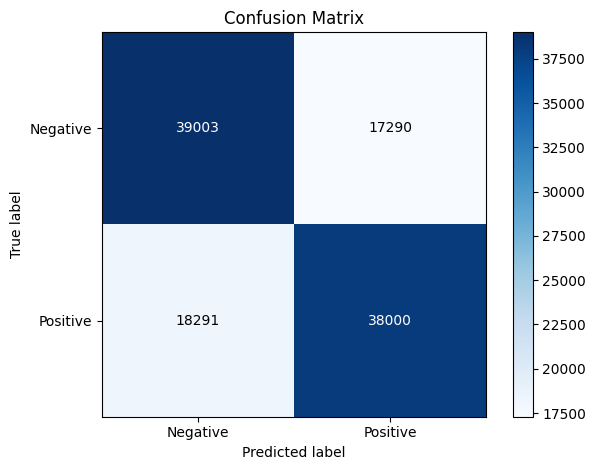

In [96]:
# Confusion Metics Logistic regression

class_labels = ['Negative', 'Positive']

fig, ax = plt.subplots()
im = ax.imshow(cm_lr, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_lr.shape[1]),
       yticks=np.arange(cm_lr.shape[0]),
       xticklabels=class_labels, yticklabels=class_labels,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix Logistic Regression')

thresh = cm_lr.max() / 2.
for i in range(cm_lr.shape[0]):
    for j in range(cm_lr.shape[1]):
        ax.text(j, i, format(cm_lr[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_lr[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


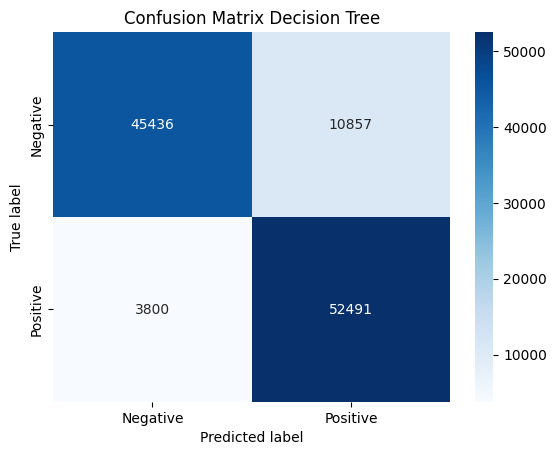

In [97]:
# Confusion Metics Decision Tree

class_labels = ['Negative', 'Positive']

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

# Menambahkan label sumbu x dan y serta judul
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Decision Tree')

# Menampilkan plot
plt.show()


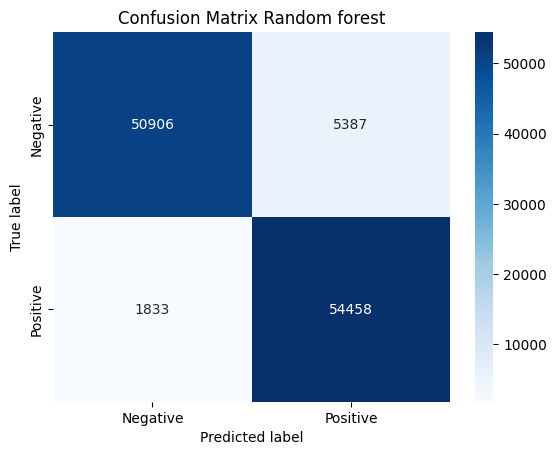

In [98]:
# Confusion Metics Random forest

class_labels = ['Negative', 'Positive']

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

# Menambahkan label sumbu x dan y serta judul
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Random forest')

# Menampilkan plot
plt.show()


## Precision and Recall Scores

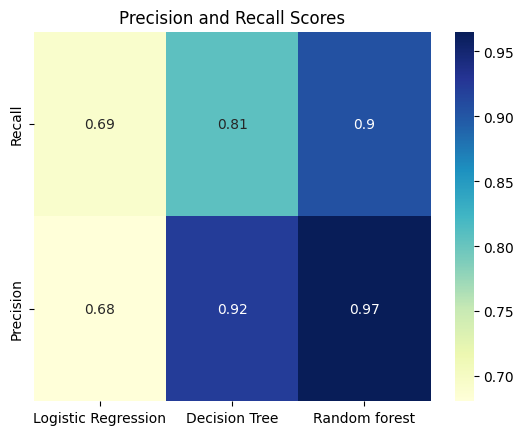

In [92]:
models = ['Logistic Regression', 'Decision Tree', 'Random forest']
recall_scores = [recall_lr, recall_dt, recall_rf]
precision_scores = [presisi_lr, presisi_dt, presisi_rf]

# Create a numpy array of the precision and recall scores
scores = np.array([recall_scores, precision_scores])

# Create a heatmap of the precision and recall scores
ax = sns.heatmap(scores, annot=True, cmap='YlGnBu', xticklabels=models, yticklabels=['Recall', 'Precision'])

# Set the title
ax.set_title('Precision and Recall Scores')

plt.show()

KESIMPULAN TEKNIS:
- model yg paling bagus adalah gradient boosting, karna dia adalah metode ensemble, yg mana metode ensemble adalah the ensemble
learning method that is commonly used to reduce variance within a
noisy dataset

## Model Performance

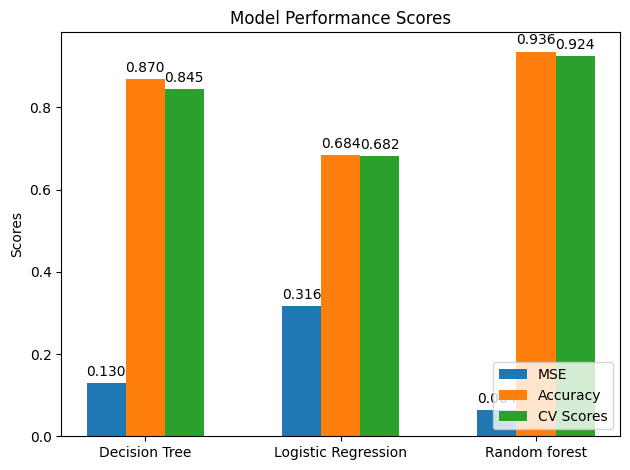

In [119]:
mse = [mse_dt, mse_lr, mse_rf]
accuracy = [accuracy_dt, accuracy_lr, accuracy_rf]
cv_scores = [cv_scores_dt.mean(), cv_scores_lr.mean(), cv_scores_rf.mean()]
labels = ['Decision Tree', 'Logistic Regression', 'Random forest']

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, mse, width, label='MSE')
rects2 = ax.bar(x, accuracy, width, label='Accuracy')
rects3 = ax.bar(x + width, cv_scores, width, label='CV Scores')

# add value labels to each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

ax.set_ylabel('Scores')
ax.set_title('Model Performance Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')
fig.tight_layout()

plt.show()

## AUC & ROC

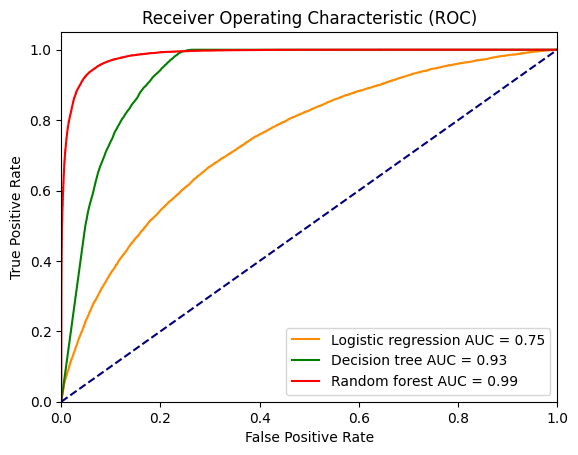

In [117]:
ypred_proba1 = lr.predict_proba(X_test)[::, 1]
ypred_proba2 = dt.predict_proba(X_test)[::, 1]
ypred_proba3 = rf.predict_proba(X_test)[::, 1]

fp1, tp1, _1 = met.roc_curve(y_test, ypred_proba1)
fp2, tp2, _2 = met.roc_curve(y_test, ypred_proba2)
fp3, tp3, _3 = met.roc_curve(y_test, ypred_proba3)

auc1 = met.roc_auc_score(y_test, ypred_proba1)
auc2 = met.roc_auc_score(y_test, ypred_proba2)
auc3 = met.roc_auc_score(y_test, ypred_proba3)

plt.plot(fp1, tp1, color='darkorange', label='Logistic regression AUC = %0.2f' % auc1)
plt.plot(fp2, tp2, color='green', label='Decision tree AUC = %0.2f'% auc2)
plt.plot(fp3, tp3, color='red', label='Random forest AUC = %0.2f' % auc3)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

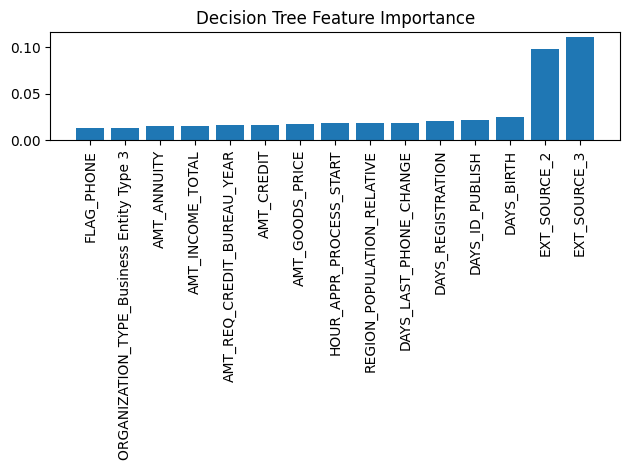

In [129]:
importances = dt.feature_importances_
features = X.columns

indices = np.argsort(importances)[165:]

plt.title("Decision Tree Feature Importance")

plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), features[indices], rotation='vertical', )
# plt.plot(kind='barh')
plt.tight_layout()
plt.show()

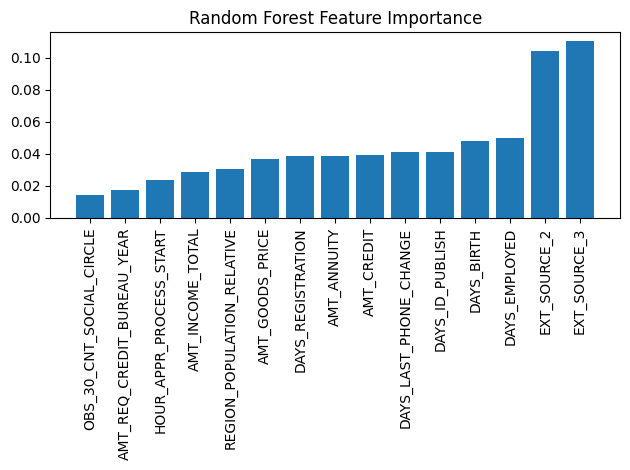

In [128]:
importances = rf.feature_importances_
indices = np.argsort(importances)[165:]
features = X.columns

plt.title("Random Forest Feature Importance")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), features[indices], rotation='vertical')
plt.tight_layout()
plt.show()


---
# Visualization

In [157]:
df_train.head(7)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-155-f9720a3d78dc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  target_nameContract = df_train.groupby(['NAME_CONTRACT_TYPE',]).sum()['TARGET']


Text(0.5, 1.0, 'target across name contract')

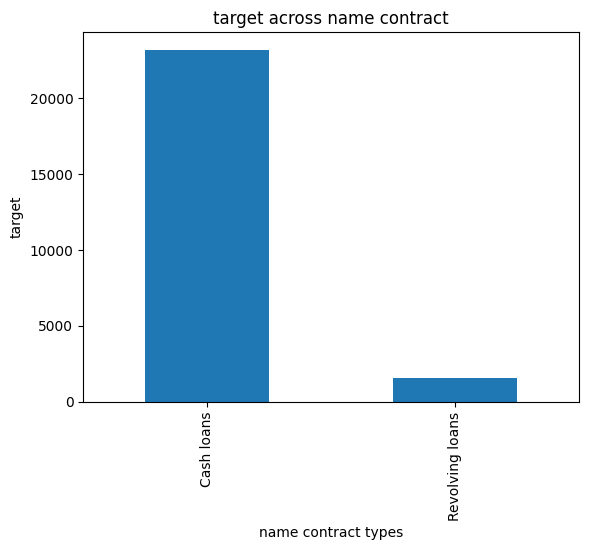

In [155]:
target_nameContract = df_train.groupby(['NAME_CONTRACT_TYPE',]).sum()['TARGET']
target_nameContract.plot(kind='bar')
plt.xlabel('name contract types')
plt.ylabel('target')
plt.title('target across name contract')

<ipython-input-48-dec8e61a1c33>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  target_nameContract = df_train.groupby(['NAME_CONTRACT_TYPE', 'CODE_GENDER']).sum()['TARGET']


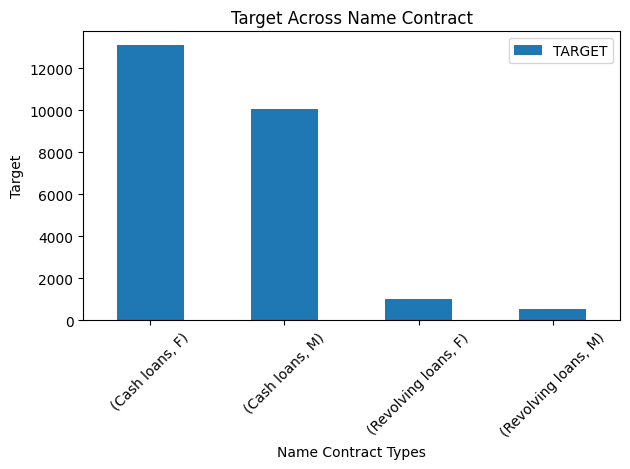

In [ ]:
import matplotlib.pyplot as plt

target_nameContract = df_train.groupby(['NAME_CONTRACT_TYPE', 'CODE_GENDER']).sum()['TARGET']
target_nameContract.plot(kind='bar')

plt.xlabel('Name Contract Types')
plt.ylabel('Target')
plt.title('Target Across Name Contract')

plt.xticks(rotation=45)  # Mengatur rotasi label sumbu x agar lebih mudah dibaca
plt.legend()  # Menampilkan legenda

plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
plt.show()


In [ ]:
# # Visualization of the Category column across Reviews
# y = df_train['TARGET']
# x = df_train['NAME_INCOME_TYPE']

# plt.scatter(x, y)
# plt.xlabel('Target')
# plt.ylabel('Name Income types')
# plt.title('Name income type across target')

In [ ]:
# sns.heatmap(df_train.corr(), annot=True)
# df_train.value_counts()

<ipython-input-153-39e5cfe88ce7>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE']].corr()


<Axes: >

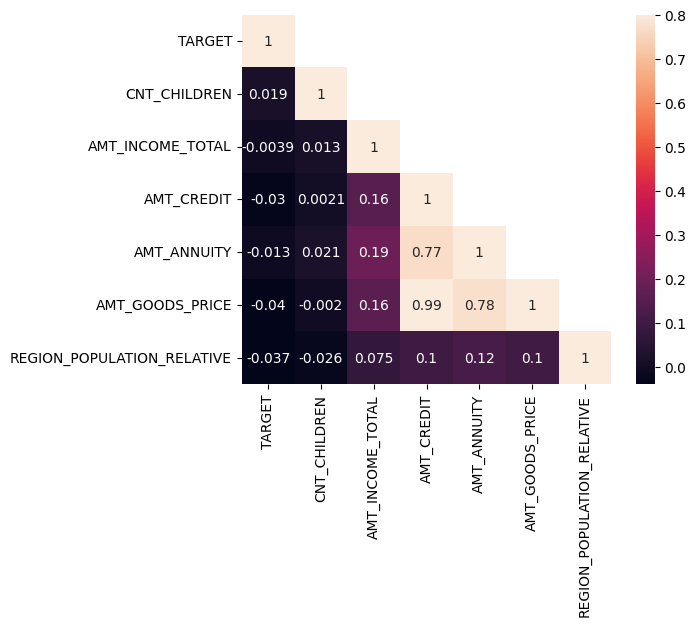

In [153]:
# df.head()
corrMatt = df_train[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','NAME_TYPE_SUITE',
        'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
        'NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
# fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)


<Axes: >

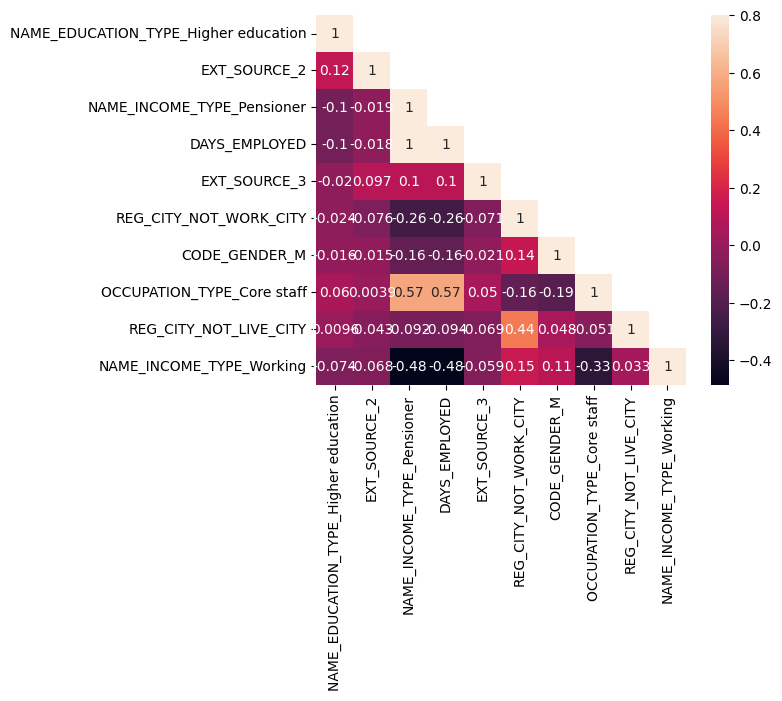

In [154]:
lis_feature_score = list(feature_scores.Features[:10].unique())
lis_feature_score

# df.head()
corrMatt = df_train[lis_feature_score].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
